# ch.saketh BL.EN.U4AIE21037


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.signal import spectrogram
speech_file = "saketh.wav"
speech_signal, your_sampling_rate = librosa.load(speech_file)

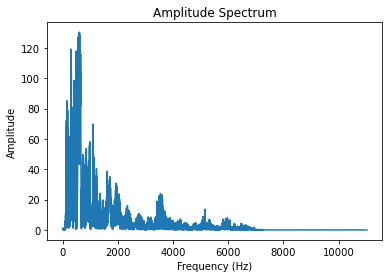

In [24]:
# A1. Spectral Analysis
fft_result = np.fft.fft(speech_signal)
freq_axis = np.fft.fftfreq(len(speech_signal), d=1/your_sampling_rate)
plt.plot(freq_axis[:len(freq_axis)//2], np.abs(fft_result[:len(freq_axis)//2]))
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

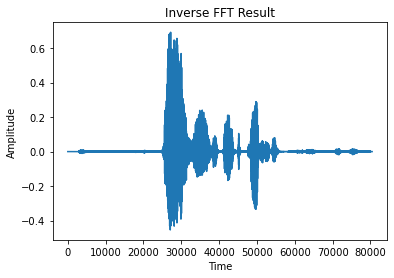

In [15]:
# A2. Inverse Transform
inv_fft_result = np.fft.ifft(fft_result)
plt.plot(np.real(inv_fft_result))  # Take the real part for visualization
plt.title('Inverse FFT Result')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

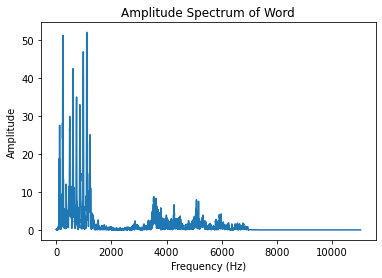

In [16]:
# A3. Spectral Analysis of a Word
word_start = int(2 * your_sampling_rate)
word_end = int(3 * your_sampling_rate)
word_signal = speech_signal[word_start:word_end]
word_fft_result = np.fft.fft(word_signal)
freq_axis_word = np.fft.fftfreq(len(word_signal), d=1/your_sampling_rate)
plt.plot(freq_axis_word[:len(freq_axis_word)//2], np.abs(word_fft_result[:len(freq_axis_word)//2]))
plt.title('Amplitude Spectrum of Word')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

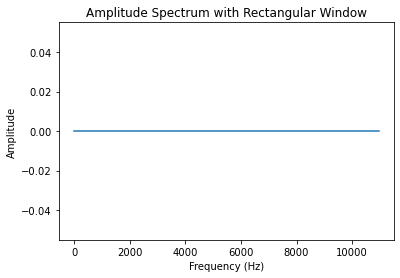

In [17]:
# A4. Spectral Analysis with Rectangular Window
window_size = int(0.02 * your_sampling_rate)  # 20 milliseconds
rectangular_window = np.ones(window_size)
rectangular_fft_result = np.fft.fft(speech_signal[:window_size] * rectangular_window)
freq_axis_rectangular = np.fft.fftfreq(window_size, d=1/your_sampling_rate)
plt.plot(freq_axis_rectangular[:len(freq_axis_rectangular)//2], np.abs(rectangular_fft_result[:len(freq_axis_rectangular)//2]))
plt.title('Amplitude Spectrum with Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

C:\Users\chila\AppData\Local\Temp\ipykernel_16868\3486290974.py:11: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(spec_matrix), cmap='viridis', aspect='auto', origin='lower')


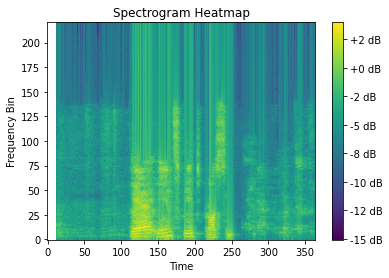

In [18]:
# A5. Break into Windows and Create Heatmap
window_length = int(0.02 * your_sampling_rate)  # 20 milliseconds
hop_length = int(0.01 * your_sampling_rate)  # 10 milliseconds
num_windows = int(len(speech_signal) / hop_length) - 1
spec_matrix = np.zeros((window_length // 2 + 1, num_windows))

for i in range(num_windows):
    window_data = speech_signal[i * hop_length : i * hop_length + window_length]
    spec_matrix[:, i] = np.abs(np.fft.rfft(window_data))

plt.imshow(np.log(spec_matrix), cmap='viridis', aspect='auto', origin='lower')
plt.title('Spectrogram Heatmap')
plt.xlabel('Time')
plt.ylabel('Frequency Bin')
plt.colorbar(format='%+2.0f dB')
plt.show()

C:\Users\chila\AppData\Local\Temp\ipykernel_16868\883325278.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_result), shading='auto')


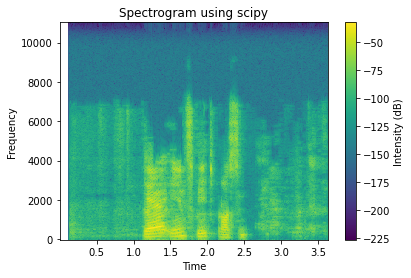

In [19]:
# A6. Spectrogram using scipy
frequencies, times, spectrogram_result = spectrogram(speech_signal, fs=your_sampling_rate, nperseg=window_length, noverlap=hop_length)
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_result), shading='auto')
plt.title('Spectrogram using scipy')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(label='Intensity (dB)')
plt.show()